Подготовим различные графы, на которых будем измерять время работы алгоритма. Например, сгенерируем одни из самых плохих графов по асимптотике, а также случайные и полные и сравним на них время работы.

На графике покажем зависимость времени исполнения от размера графа а также вида графа на входе.

Существенным оказывается не столько размер самого графа, сколько его вид: на случайных графах алгоритм очень эффективен и наименее эффективен на тех, у которых количество клик (в том числе максимальных клик) экспоненциально зависит от размера графа.

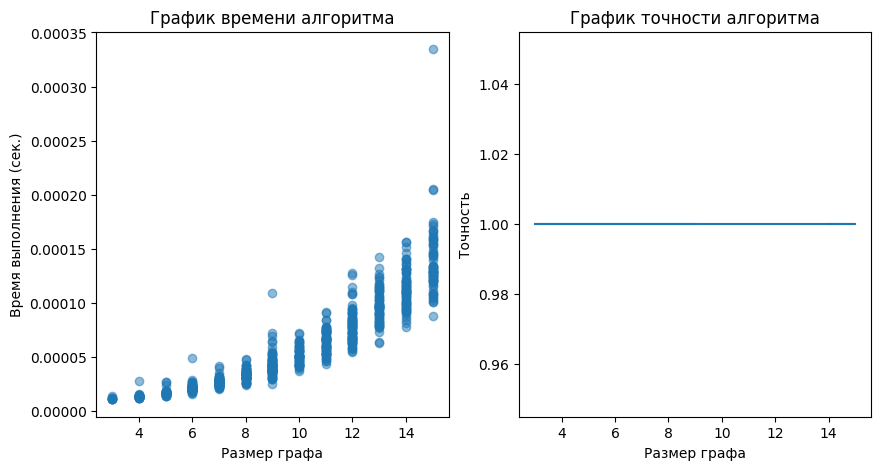

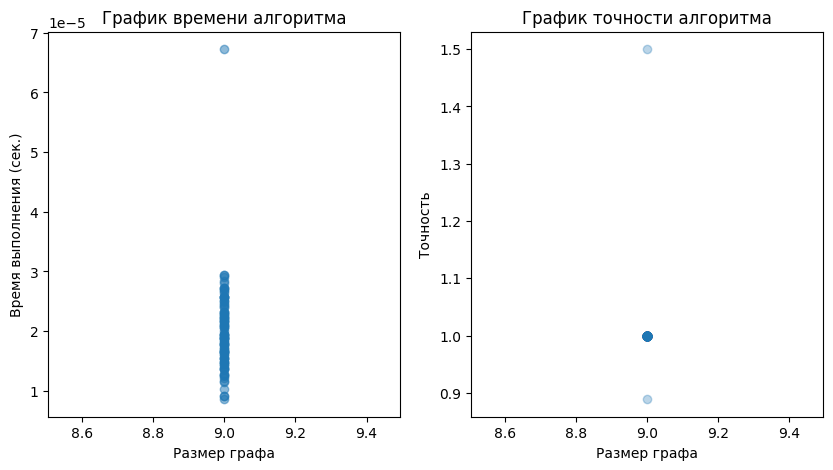

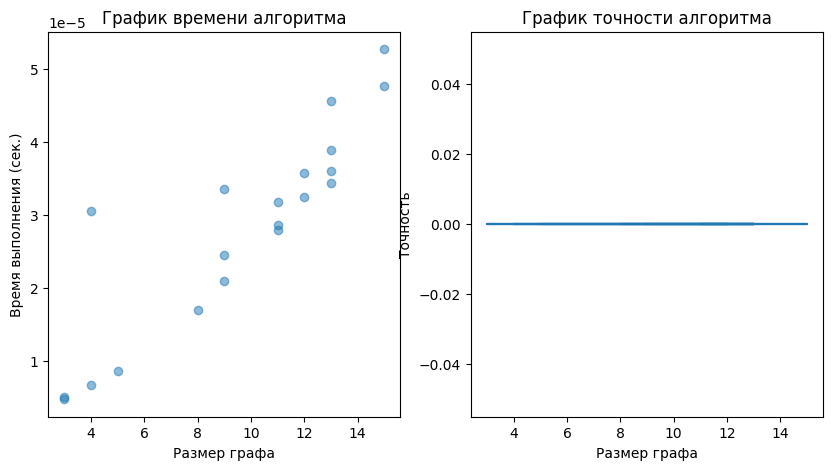

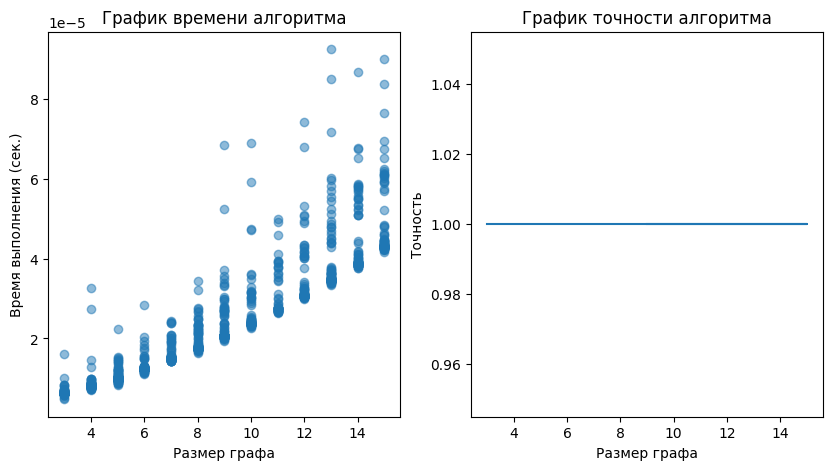

<Axes: >

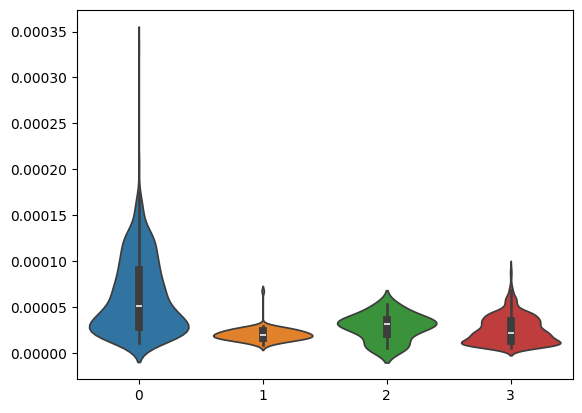

In [2]:
import collections
import random
import matplotlib.pyplot as plt
import time
import seaborn as sns
from itertools import combinations

def algo(cur, remarr, addarr, g, answer):
    """Алгоритм разработанный Броном и Кербошем для поиска клик в графе"""
    if len(remarr) == 0 and len(addarr) == 0:
        if len(cur) > 2:
            answer.append(sorted(cur))            
        return

    d, pivot = max([(len(g[v]), v) for v in remarr.union(addarr)])
                     
    for v in remarr.difference(g[pivot]):
        algo(cur.union(set([v])), remarr.intersection(g[v]), addarr.intersection(g[v]), g, answer)
        remarr.remove(v)
        addarr.add(v)
        
def returnResult(testcase):
    '''Возвращаем все наибольшие клики в графе'''
    answer = []

    g = collections.defaultdict(set) 
    for (src,dest) in testcase:
        g[src].add(dest)
    algo(set([]), set(g.keys()), set([]), g, answer)
    maxlen = 0
    result = []
    for c in sorted(answer):
        if (len(c) == maxlen):
          result.append(c)
        elif (len(c) > maxlen):
          maxlen = len(c)
          result = [c]
    
    return result

def find_maximal_cliques(edges):

  graph = {}
  for edge in edges:
    u, v = edge
    graph[u] = graph.get(u, set()) | set([v])
    graph[v] = graph.get(v, set()) | set([u])

  maximal_cliques = []
  for i in range(1, len(graph) + 1):
    for subset in combinations(graph.keys(), i):
      is_clique = True
      for v in subset:
        for u in subset:
          if u != v and u not in graph[v]:
            is_clique = False
            break
      if is_clique:
        maximal_cliques.append(sorted(subset))
  k = 2
  res = []
  for cl in maximal_cliques:
     if (len(cl) == k):
        res.append(cl)
     if (len(cl) > k):
        k = len(cl)
        res = [cl]
  if (k == 2):
     return []
  return res


import random

def generate_simple_graphs(num_graphs=1000):
  """Генерирует список простых графов.

  Args:
    num_graphs: количество графов для генерации.

  Returns:
    Список простых графов, представленных как списки кортежей ребер.
  """

  graphs2 = []
  ns2 = []
  for _ in range(num_graphs):
    num_vertices = random.randint(3, 15)
    graph = []
    ns22 = set()
    for i in range(num_vertices):
      for j in range(i + 1, num_vertices):
        if random.random() < 0.5:
          ns22.add(i + 1)
          ns22.add(j + 1)
          graph.append((i + 1, j + 1))
          graph.append((j + 1, i + 1))

    # Добавим граф в список.
    graphs2.append(graph)
    ns2.append(len(ns22))

  return graphs2, ns2
  
def generate_full_graphs(num_graphs=1000):
  """Генерирует список простых графов.

  Args:
    num_graphs: количество графов для генерации.

  Returns:
    Список простых графов, представленных как списки кортежей ребер.
  """

  graphs2 = []
  ns2 = []
  for _ in range(num_graphs):
    # Сгенерируем случайное количество вершин в графе.
    num_vertices = random.randint(3, 15)

    # Создадим пустой граф.
    graph = []
    ns22 = set()
    for i in range(num_vertices):
      for j in range(i + 1, num_vertices):
          ns22.add(i + 1)
          ns22.add(j + 1)
          graph.append((i + 1, j + 1))
          graph.append((j + 1, i + 1))

    # Добавим граф в список.
    graphs2.append(graph)
    ns2.append(len(ns22))

  return graphs2, ns2
def generate_fixed_graphs(num_graphs, num_vertices, num_edges):
  """Generates a list of graphs with a fixed number of edges.

  Args:
    num_graphs: The number of graphs to generate.
    num_vertices: The number of vertices in each graph.
    num_edges: The number of edges in each graph.

  Returns:
    A list of graphs.
  """

  graphs = []
  ns = []
  for _ in range(num_graphs):
    edges = set()

    
    while len(edges) < num_edges:
      
      edge = (random.randint(1, num_vertices), random.randint(1, num_vertices))

      if edge not in edges:
        edges.add(edge)
   
    edges = list(edges)
    graph = []
    for edge in edges:
      graph.append((edge[0], edge[1]))
   
    graphs.append(graph)
  ns = [num_vertices] * num_graphs
  return graphs, ns


def generate_eulerian_graphs(num_graphs):
  """Generates a list of Eulerian graphs.

  Args:
    num_graphs: The number of graphs to generate.
    num_vertices: The number of vertices in each graph.

  Returns:
    A list of Eulerian graphs.
  """

  graphs = []
  ns2 = []
  for _ in range(num_graphs):
    num_vertices = random.randint(3, 15)
    graph = []
    ns3 = set()
    for i in range(1, num_vertices + 1):
      
      permutation = list(range(1, num_vertices + 1))
      random.shuffle(permutation)

      for j in range(num_vertices - 1):
        graph.append((i, permutation[j]))
        graph.append((permutation[j], i))
        ns3.add(permutation[j])
        ns3.add(i)

      graph.append((i, permutation[-1]))
      graph.append((permutation[-1], i))
      ns3.add(permutation[-1])
      ns3.add(i)
    ns2.append(len(ns3))

    graphs.append(graph)

  return graphs, ns2

timegraphs = []
def printGraphs(k):
    graphs2, ns2 = k
    graphs = []
    ns = []
    for i in range (len(graphs2)):
        if len(find_maximal_cliques(graphs2[i])) != 0:
           graphs.append(graphs2[i])
           ns.append(ns2[i])

    for i in range (len(graphs)):    
        graphs1 = []
        for p in graphs[i]:
            graphs1.append((p[1], p[0]))
        for k in graphs1:
            graphs[i].append(k)

    # График времени
    time_graph = []
    nsacc = []
    for graph in graphs:
        start = time.time()
        returnResult(graph)
        end = time.time()
        time_graph.append(end - start)

    # График точности
    accuracy_graph = []
    for graph in graphs:
        result = returnResult(graph)
        maximal_cliques = find_maximal_cliques(graph)
        accuracy = len(result) / len(maximal_cliques)
        accuracy_graph.append(accuracy)

    plt.figure(figsize=(10, 5))

    # График времени от n
    plt.subplot(1, 2, 1)
    plt.scatter(ns, time_graph, marker='o', alpha=0.5)
    plt.xlabel('Размер графа')
    plt.ylabel('Время выполнения (сек.)')
    plt.title('График времени алгоритма')

    # График точности от n
    plt.subplot(1, 2, 2)
    plt.plot(ns, accuracy_graph)
    plt.xlabel('Размер графа')
    plt.ylabel('Точность')
    plt.title('График точности алгоритма')

    plt.show()
    timegraphs.append(time_graph)
    
    plt.show()

 
printGraphs(generate_simple_graphs())
printGraphs(generate_fixed_graphs(100,9,20))
printGraphs(generate_eulerian_graphs(20))
printGraphs(generate_full_graphs())
sns.violinplot(timegraphs)

